# Problem 1

## Setup

In [1]:
import sys
sys.path.append("../src")

import numpy as np
from nat2324.problems import Objective
from nat2324.algorithms import SwarmOptimization
from nat2324.utils import visualize_objectives_3d, visualize_optimization_experiments, run_optimization_experiment

%load_ext autoreload
%autoreload 2

In [2]:
# Fix the number of evaluations
NUM_GENERATIONS = 1000

# Fix the problem difficulty
DIMENSION = 4
FUNCTION_TYPE = "rastrigin"
FUNCTION_BOUNDS = (-5.12, 5.12)

## Question (a)

### Particle Swarm Optimization

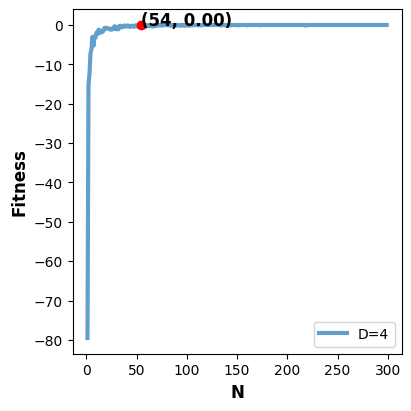

In [15]:
experiment_setup = {
    "N": range(1, 300, 1),
}

default_kwargs = {
    "fitness_fn": Objective(function_type="rastrigin", is_maximization=True),
    "bounds": FUNCTION_BOUNDS,
    "D": DIMENSION,
    "max_generations": NUM_GENERATIONS,
    "patience": None,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=10,
    dirname="../experiments/problem1",
)

visualize_optimization_experiments(
    xs=experiment_setup,
    ys={"Fitness": results['N']},
    curve_labels="D=4",
    is_maximization=True,
    filepath="../experiments/problem1/fitness_vs_N.png",
)

### Other Metaheuristic algorithms

  0%|          | 0/396 [00:00<?, ?it/s]

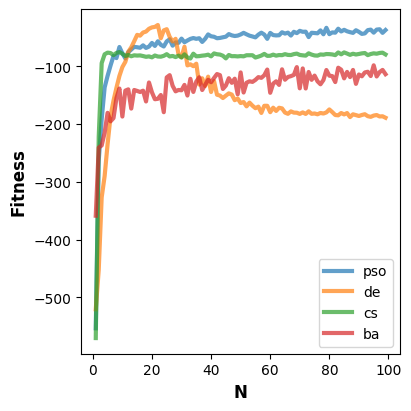

In [84]:
experiment_setup = {
    "N": range(1, 100, 1),
    "so_type": ["pso", "de", "cs", "ba"]
}

default_kwargs = {
    "fitness_fn": Objective(function_type="rastrigin", is_maximization=True),
    "bounds": FUNCTION_BOUNDS,
    "D": 30,
    "max_generations": NUM_GENERATIONS,
    "patience": None,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    num_runs=20,
    dirname="../experiments/problem1",
)

visualize_optimization_experiments(
    xs={'N': experiment_setup['N']},
    ys={"Fitness": results[('N', "so_type")][..., 0]},
    curve_labels=experiment_setup["so_type"],
    filepath="../experiments/problem1/fitness_vs_N_vs_pso_type.png",
)

## Question (b)

### Varying Space Dimension

In [20]:
experiment_setup = {
    "N": range(1, 200, 4),
    "D": range(1, 200, 4),
    "so_type": ["pso", "de"],
}

default_kwargs = {
    "fitness_fn": Objective(function_type="rastrigin", is_maximization=True),
    "bounds": FUNCTION_BOUNDS,
    "num_generations": NUM_GENERATIONS,
    "patience": None,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=10,
    dirname="../experiments/problem1",
)

ps = results[('N', 'D', "so_type")][:, :, 0]
de = results[('N', 'D', "so_type")][:, :, 1]
ns = np.array(experiment_setup["N"])

  0%|          | 0/5000 [00:00<?, ?it/s]

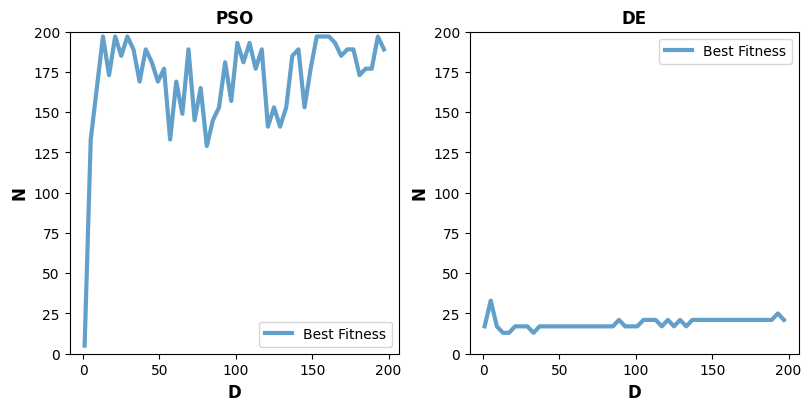

In [26]:
visualize_optimization_experiments(
    xs={"D": experiment_setup["D"]},
    ys={"PSO": ns[ps.argmax(0)], "DE": ns[de.argmax(0)]},
    curve_labels="Best Fitness",
    labels='N',
    ylim=(0, 200),
    filepath="../experiments/problem1/dependency_on_D_1.png",
)

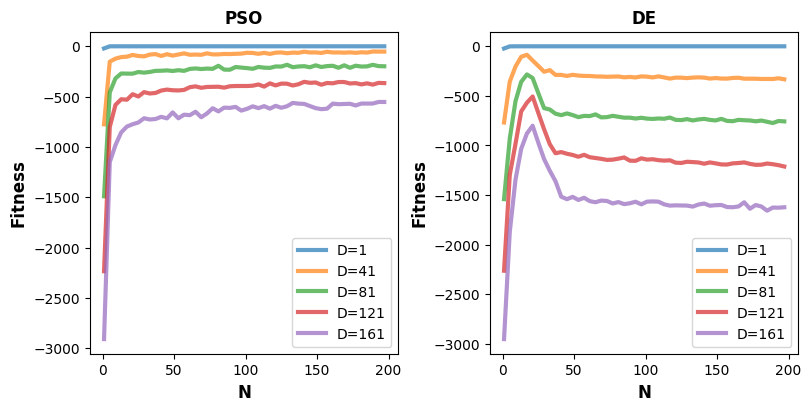

In [24]:
visualize_optimization_experiments(
    xs={'N': experiment_setup['N']},
    ys={"PSO": ps[:, ::10, 0], "DE": de[:, ::10, 0]},
    curve_labels=[f"D={d}" for d in list(experiment_setup["D"])[::10]],
    labels="Fitness",
    filepath="../experiments/problem1/dependency_on_D_2.png",
)

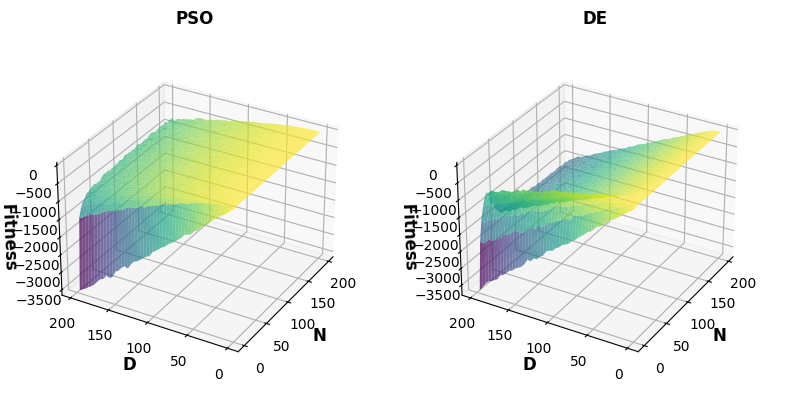

In [25]:
visualize_optimization_experiments(
    xs={'N': experiment_setup['N']},
    ys={'D': experiment_setup['D']},
    zs={"PSO": ps, "DE": de},
    labels="Fitness",
    elev=30,
    azim=-150,
    filepath="../experiments/problem1/dependency_on_D_3.png",
)

### Varying Objective

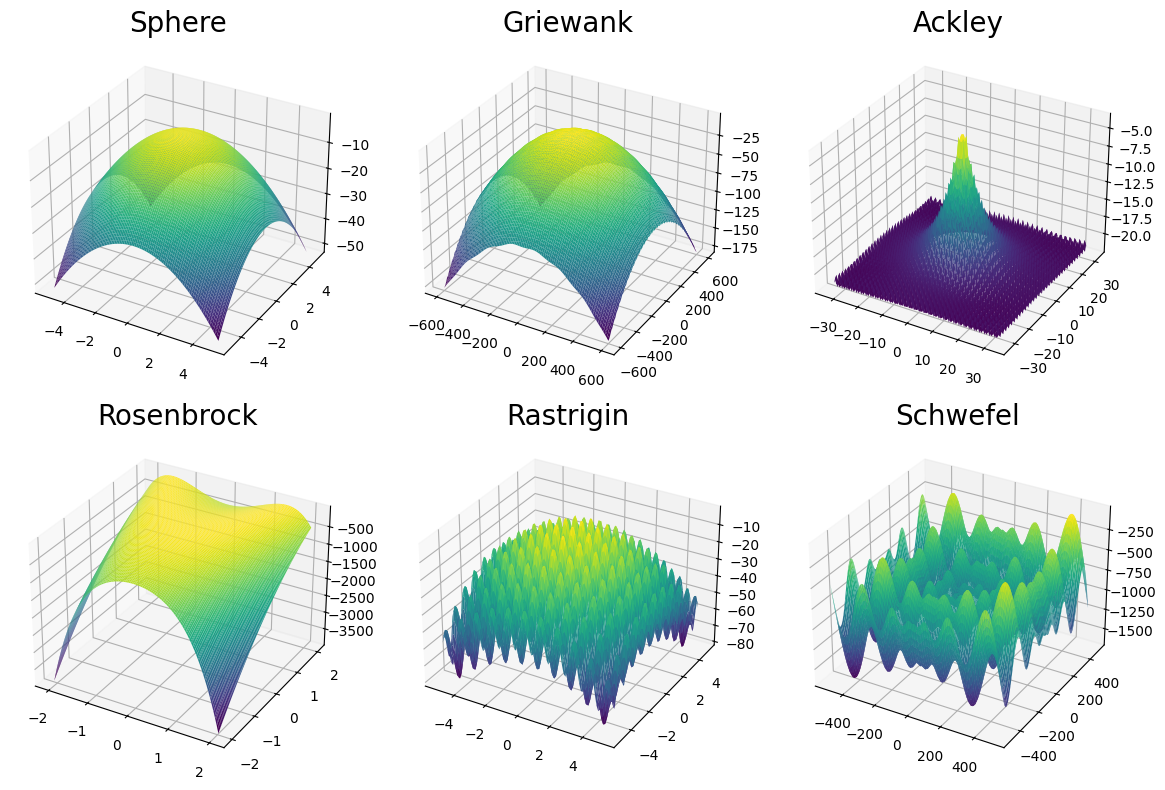

In [4]:
sphere = Objective(function_type="sphere", is_maximization=True)
rosenbrock = Objective(function_type="rosenbrock", is_maximization=True)
ackley = Objective(function_type="ackley", is_maximization=True)
rastrigin = Objective(function_type="rastrigin", is_maximization=True)
griewank = Objective(function_type="griewank", is_maximization=True)
schwefel = Objective(function_type="schwefel", is_maximization=True)

objectives = {
    "Sphere": (sphere, sphere.bounds),
    "Griewank": (griewank, griewank.bounds),
    "Ackley": (ackley, ackley.bounds),
    "Rosenbrock": (rosenbrock, rosenbrock.bounds),
    "Rastrigin": (rastrigin, rastrigin.bounds),
    "Schwefel": (schwefel, schwefel.bounds),
}

visualize_objectives_3d(
    objectives,
    num_points=100,
    max_col=3,
    filepath="../experiments/problem1/objectives.png",
)

In [106]:
experiment_setup = {
    'N': range(1, 100, 1),
    ("fitness_fn", "bounds"): objectives.values(),
}

default_kwargs = {
    "num_generations": NUM_GENERATIONS,
    "patience": None,
    "D": 30,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=10,
    dirname="../experiments/problem1",
)

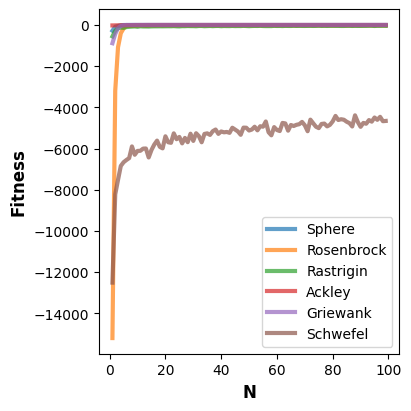

In [110]:
visualize_optimization_experiments(
    xs={'N': experiment_setup["N"]},
    ys={"Fitness": results[('N', ("fitness_fn", "bounds"))][..., 0]},
    curve_labels=list(objectives.keys()),
    # ylim=(-100, 5),
    filepath="../experiments/problem1/fitness_vs_N_vs_objective_1.png",
)

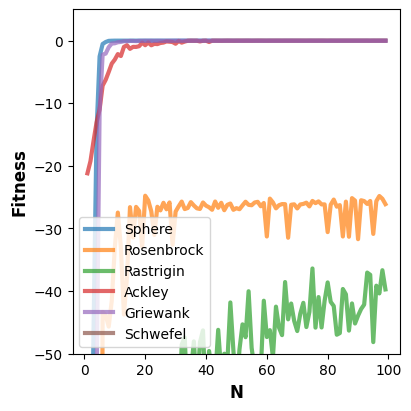

In [111]:
visualize_optimization_experiments(
    xs={'N': experiment_setup["N"]},
    ys={"Fitness": results[('N', ("fitness_fn", "bounds"))][..., 0]},
    curve_labels=list(objectives.keys()),
    ylim=(-50, 5),
    filepath="../experiments/problem1/fitness_vs_N_vs_objective_2.png",
)

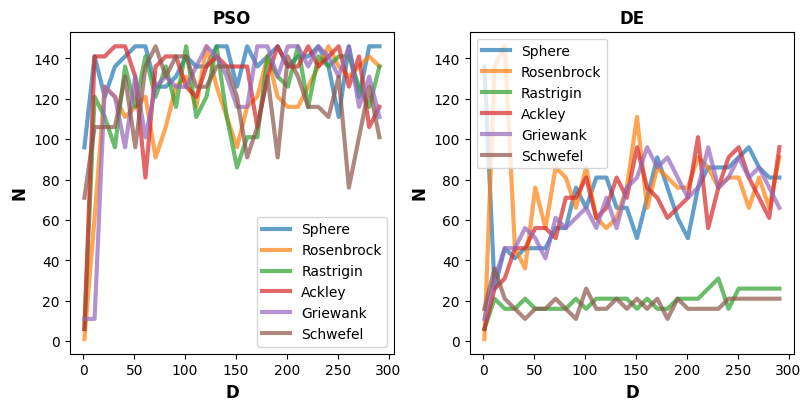

In [180]:
experiment_setup = {
    "so_type": ["pso", "de"],
    'N': range(1, 150, 5),
    'D': range(1, 300, 10),
    ("fitness_fn", "bounds"): objectives.values(),
}

default_kwargs = {
    "num_generations": NUM_GENERATIONS,
    "patience": None,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=2,
    dirname="../experiments/problem1",
)

results[("so_type", "N", "D", ("fitness_fn", "bounds"))].shape
ps = results[("so_type", "N", "D", ("fitness_fn", "bounds"))][0, :, :, :, 0]
de = results[("so_type", "N", "D", ("fitness_fn", "bounds"))][1, :, :, :, 0]
ns = np.array(experiment_setup["N"])

visualize_optimization_experiments(
    xs={'D': experiment_setup['D']},
    ys={"PSO": ns[ps.argmax(0)], "DE": ns[de.argmax(0)]},
    curve_labels=list(objectives.keys()),
    labels='N',
    filepath="../experiments/problem1/fitness_vs_N_vs_objective.png",
)

## Appendix A

### High Dimensions

In [28]:
experiment_setup = {
    "N": range(1, 1000, 25), # range(1, 100, 2)
    "D": range(1, 1000, 50), # range(1, 100, 2)
    "so_type": ["pso", "de"],
}

default_kwargs = {
    "fitness_fn": Objective(function_type="rastrigin", is_maximization=True),
    "bounds": FUNCTION_BOUNDS,
    "num_generations": NUM_GENERATIONS,
    "patience": None,
    "high-dim": None,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=1,
    dirname="../experiments/problem1",
)

ps = results[('N', 'D', 'so_type')][:, :, 0]
de = results[('N', 'D', 'so_type')][:, :, 1]
ns = np.array(experiment_setup["N"])

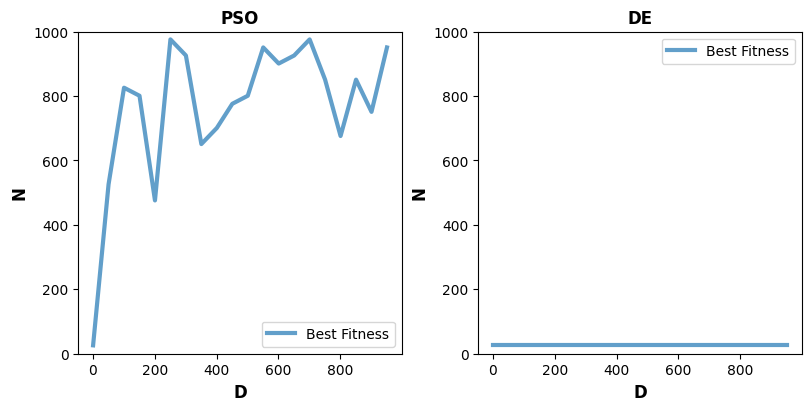

In [29]:
visualize_optimization_experiments(
    xs={"D": experiment_setup["D"]},
    ys={"PSO": ns[ps.argmax(0)], "DE": ns[de.argmax(0)]},
    curve_labels="Best Fitness",
    labels='N',
    ylim=(0, 1000),
    filepath="../experiments/problem1/dependency_on_D_1_high.png",
)

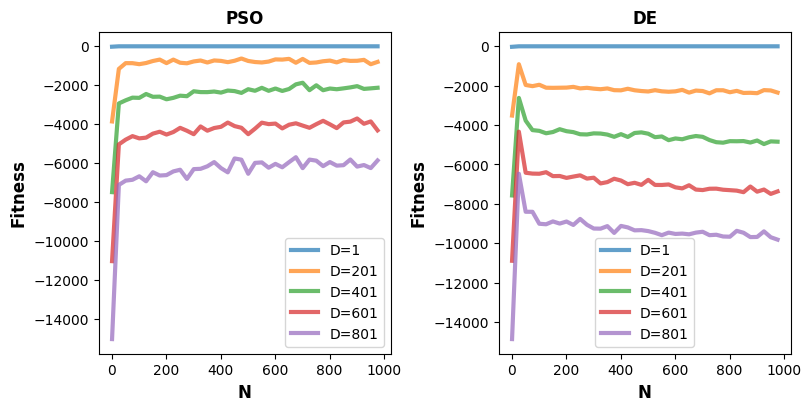

In [30]:
visualize_optimization_experiments(
    xs={'N': experiment_setup['N']},
    ys={"PSO": ps[:, ::4, 0], "DE": de[:, ::4, 0]},
    curve_labels=[f"D={d}" for d in list(experiment_setup["D"])[::4]],
    labels="Fitness",
    filepath="../experiments/problem1/dependency_on_D_2_high.png",
)

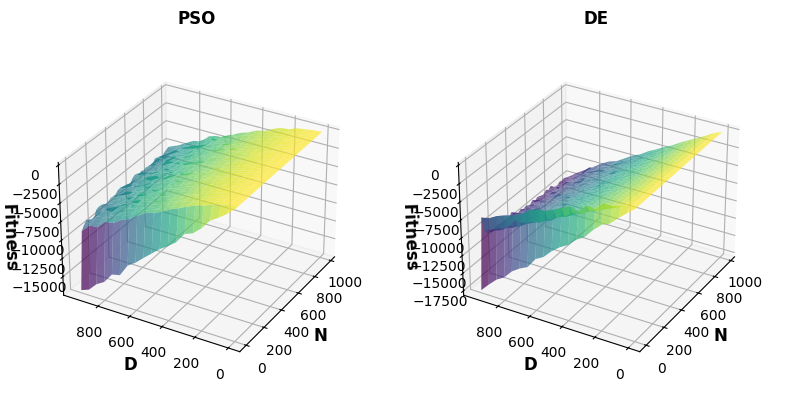

In [31]:
visualize_optimization_experiments(
    xs={'N': experiment_setup['N']},
    ys={'D': experiment_setup['D']},
    zs={"PSO": ps, "DE": de},
    labels="Fitness",
    elev=30,
    azim=-150,
    filepath="../experiments/problem1/dependency_on_D_3_high.png",
)

### Algorithms vs Objectives vs Dimensions

In [33]:
RANGE_N = range(1, 300, 3)
RANGE_D = range(1, 300, 10)
NS = np.array(RANGE_N)

def run_obj_vs_dim(so_type: str):
    experiment_setup = {
        'N': RANGE_N,
        'D': RANGE_D,
        ("fitness_fn", "bounds"): objectives.values(),
    }

    default_kwargs = {
        "num_generations": NUM_GENERATIONS,
        "so_type": so_type,
        "patience": None,
    }

    results = run_optimization_experiment(
        SwarmOptimization.experiment_callback,
        experiment_setup,
        default_kwargs,
        is_cartesian_product=True,
        chunksize=5,
        num_runs=10,
        dirname="../experiments/problem1",
    )

    return results

  0%|          | 0/18000 [00:00<?, ?it/s]

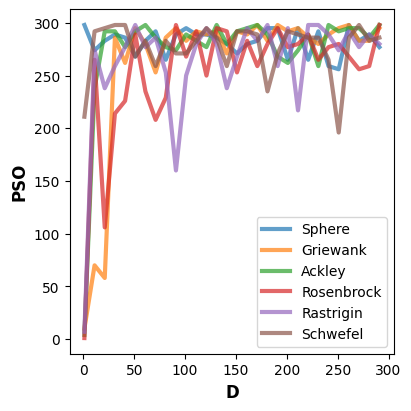

In [34]:
results = run_obj_vs_dim("pso")
ns = np.array(RANGE_N)
ps = results[('N', 'D', ("fitness_fn", "bounds"))][:, :, :, 0]

visualize_optimization_experiments(
    xs={'D': RANGE_D},
    ys={"PSO": NS[ps.argmax(0)]},
    curve_labels=list(objectives.keys()),
    filepath="../experiments/problem1/fitness_vs_N_vs_objective_ps.png",
)

In [ ]:
results = run_obj_vs_dim("de")
de = results[('N', 'D', ("fitness_fn", "bounds"))][:, :, :, 0]

visualize_optimization_experiments(
    xs={'D': RANGE_D},
    ys={"PSO": NS[de.argmax(0)]},
    curve_labels=list(objectives.keys()),
    filepath="../experiments/problem1/fitness_vs_N_vs_objective_de.png",
)

In [ ]:
results = run_obj_vs_dim("cs")
cs = results[('N', 'D', ("fitness_fn", "bounds"))][:, :, :, 0]

visualize_optimization_experiments(
    xs={'D': RANGE_D},
    ys={"PSO": NS[cs.argmax(0)]},
    curve_labels=list(objectives.keys()),
    filepath="../experiments/problem1/fitness_vs_N_vs_objective_cs.png",
)

In [ ]:
results = run_obj_vs_dim("ba")
ns = np.array(RANGE_N)
ba = results[('N', 'D', ("fitness_fn", "bounds"))][:, :, :, 0]

visualize_optimization_experiments(
    xs={'D': RANGE_D},
    ys={"PSO": NS[ba.argmax(0)]},
    curve_labels=list(objectives.keys()),
    filepath="../experiments/problem1/fitness_vs_N_vs_objective_ba.png",
)

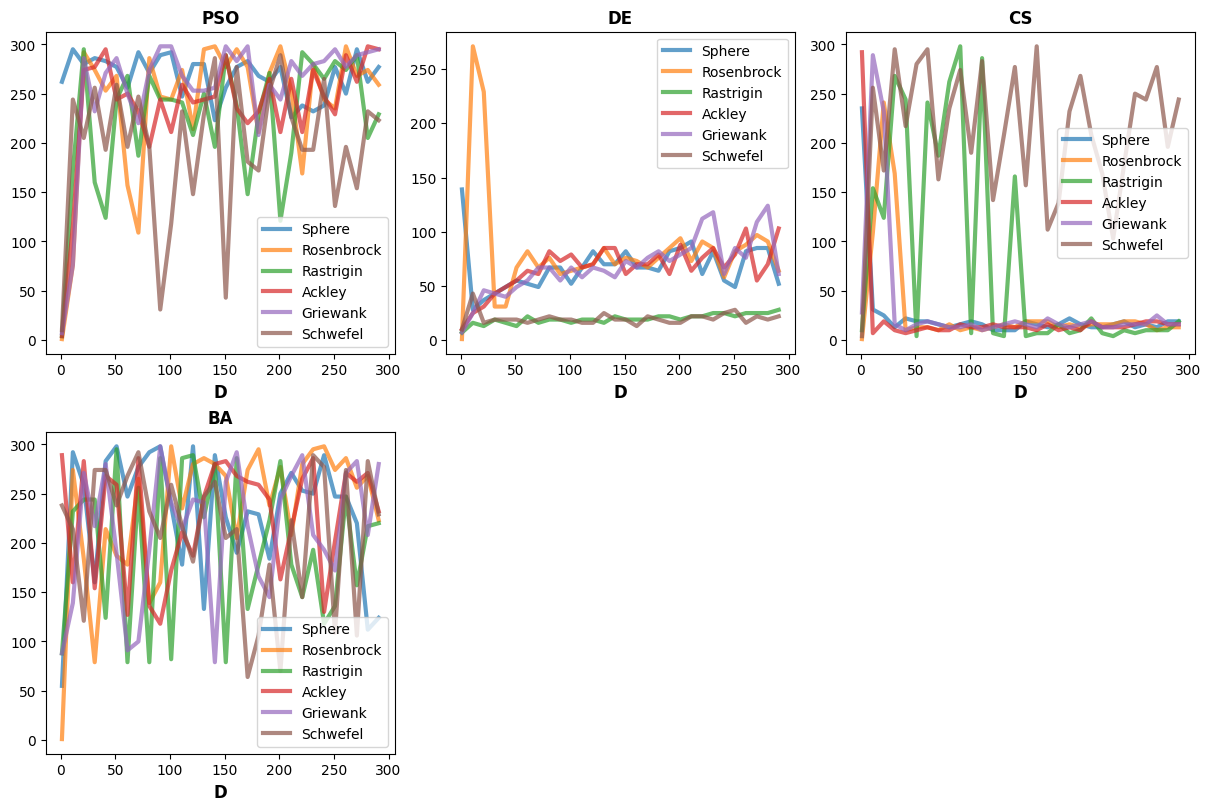

### Efficiency

  0%|          | 0/40 [00:00<?, ?it/s]

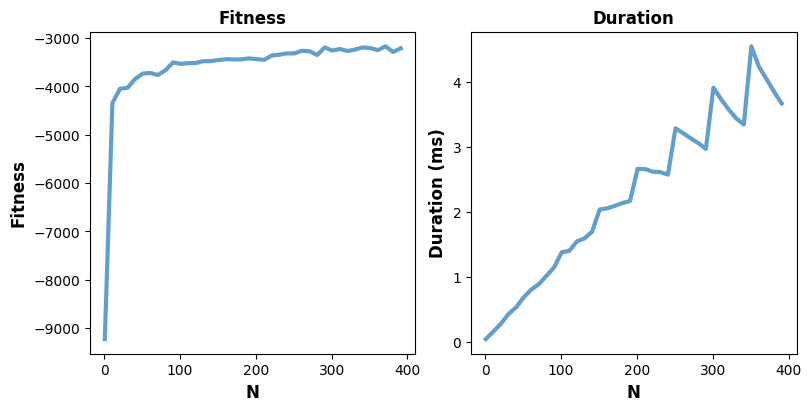

In [11]:
experiment_setup = {
    'N': range(1, 400, 10),
}

default_kwargs = {
    "fitness_fn": rastrigin,
    "bounds": rastrigin.bounds,
    "num_generations": NUM_GENERATIONS,
    "extra_return": ("last_score", "last_duration"),
    "patience": None,
    'D': 500,
}

results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    chunksize=5,
    num_runs=15,
    dirname="../experiments/problem1",
)

visualize_optimization_experiments(
    xs={'N': experiment_setup['N']},
    ys={"Fitness": results['N'][:, 0:1], "Duration": results['N'][:, 1:2]},
    labels=["Fitness", "Duration (s)"],
    filepath="../experiments/problem1/fitness_vs_efficiency.png",
)